Steps:
- import dataset
- data cleaning (Tokenization,Stemming,Lemmatization,Stopwords)
- bag of words (count vector,TFIDF) / Word2Vec [VECTORIZATION]
- model training/prediction

In [1]:
import pandas as pd
import numpy as np

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
df

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1      advice Talk to your neighbours family to excha...            Positive  
2      Coronavirus Australia: Woolworths to give elde...            Positive  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                  ...                 ...  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[41157 rows x 6 columns]

In [7]:
df_sample = df.sample(frac=0.2)

In [9]:
# Our data cleaning function

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialising
lemmatizer = WordNetLemmatizer()

stop_words = stopwords.words("english")

def datacleaning(mystring):
    # Step 1 
    # Tokenize the string
    try:
        my_tokenized_string = word_tokenize(mystring)
        
        # ----------------- End of step 1 ----------------- #
        
        temp = []
        for i in my_tokenized_string:
    #         print(f'i right now is ({i})')
            i = i.lower()
            if i in stop_words or not(i.isalpha()):
                pass
            else:
                # Appending a word that is not a stopword and lemmatizing the same at the same time
                temp.append(lemmatizer.lemmatize(i))
    
        my_new_string = ' '.join(temp)
        return my_new_string
    except:
        return ''

In [10]:
%%time
df_sample['CleanedTweet'] = df_sample.OriginalTweet.apply(datacleaning)

Wall time: 6.96 s


In [14]:
le = LabelEncoder()
le.fit(df_sample.Sentiment)

LabelEncoder()

In [19]:
df_sample['Sentiment_Code'] = le.transform(df_sample.Sentiment)

In [20]:
df_sample

UserName  ScreenName                      Location     TweetAt  \
38066     41865       86817     a big gay world of my own  11-04-2020   
9683      13482       58434                    Edmond, OK  20-03-2020   
13039     16838       61790                   Nova Scotia  21-03-2020   
26887     30686       75638                   Doha, Qatar  02-04-2020   
12639     16438       61390                      Barbados  21-03-2020   
...         ...         ...                           ...         ...   
8234      12033       56985                           NaN  19-03-2020   
37789     41588       86540                   ? Salford ?  11-04-2020   
14739     18538       63490                           NaN  22-03-2020   
16251     20050       65002  North Windsor (aka Slough..)  22-03-2020   
39874     43673       88625  Mississauga, Ontario, Canada  13-04-2020   

                                           OriginalTweet           Sentiment  \
38066  @joaniwalshi @INDYCAMP261115 This is not about...             Neutral   
9683   I went to the grocery store today because I am...  Extremely Negative   
13039  This morning at the supermarket searching for ...            Negative   
26887  The supermarkets of Al Meera Consumer Goods Co...             Neutral   
12639  COVID-19: Merchants pledge to keep prices stea...             Neutral   
...                                                  ...                 ...   
8234   Fucking shameful. That's all. https://t.co/sZd...            Negative   
37789  @XinhuaChinese Not true #Wuhan $9 Cabbages, Em...             Neutral   
14739  As COVID 19 hits the world so we drop our pric...            Negative   
16251  These guys are now delivering to your home!......             Neutral   
39874  @Haris_haroon Hi Haris, if you believe a busin...            Negative   

                                            CleanedTweet  Sentiment_Code  
38066  joaniwalshi independence flower still othe cou...               3  
9683   went grocery store today still working family ...               0  
13039  morning supermarket searching movie cardboard ...               2  
26887  supermarket al meera consumer good started pol...               3  
12639             merchant pledge keep price steady http               3  
...                                                  ...             ...  
8234                               fucking shameful http               2  
37789  xinhuachinese true wuhan cabbage emergency por...               3  
14739  covid hit world drop price dropping price clas...               2  
16251  guy delivering home stayhomesavelives coronavi...               3  
39874  hi haris believe business price gouging file c...               2  

[8231 rows x 8 columns]

### Loading Word2Vec

In [23]:
import gensim
from gensim.models import Word2Vec

In [24]:
path = 'GoogleNews-vectors-negative300.bin.gz'

In [26]:
%%time
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)
model

Wall time: 1min


In [38]:
model['virus']

array([ 1.88476562e-01, -1.57470703e-02, -7.17163086e-03,  3.71093750e-02,
       -3.06640625e-01,  2.53906250e-01, -3.10546875e-01,  5.54199219e-02,
        2.57812500e-01, -3.27148438e-02,  1.22070312e-01, -5.58593750e-01,
        1.94335938e-01, -1.65039062e-01, -2.06054688e-01,  2.48046875e-01,
       -6.34765625e-02,  3.47656250e-01,  1.74804688e-01, -6.93359375e-02,
        6.29882812e-02,  1.17187500e-01,  1.87500000e-01, -1.19140625e-01,
        3.27148438e-02, -1.95312500e-01,  4.71191406e-02, -3.08593750e-01,
        3.59375000e-01,  6.54296875e-02, -1.39648438e-01, -3.59375000e-01,
        4.35546875e-01, -9.42382812e-02, -2.82287598e-03, -8.10546875e-02,
       -4.12109375e-01,  1.31835938e-01, -5.10253906e-02,  5.89843750e-01,
        7.47070312e-02, -1.47460938e-01, -1.89453125e-01,  2.28515625e-01,
        6.15234375e-02, -6.29882812e-02,  3.67187500e-01,  5.00488281e-03,
       -3.22265625e-01,  1.31835938e-01,  7.91015625e-02, -4.00390625e-02,
       -6.59179688e-02,  

In [39]:
len(model['virus'])

300

In [40]:
from nltk.tokenize import word_tokenize


def vectorizer(x):
    # Get your text
    # Tokenizing (break your text into words)
    my_tokenized_string = word_tokenize(x)

    # ----------------- End of step 1 ----------------- #    
    word_vectors = []
    # Loop over your words 1 by 1
    for i in my_tokenized_string:
        try:
            # Getting the vector for your words 
            word_vectors.append(model[i])
        except:
            pass
    
    if len(word_vectors) > 0:    
        # Got my vectors for each word, now to take an average 
        np_word_vectors = np.array(word_vectors)
        # Calculating the mean
        np_word_vectors = np_word_vectors.mean(axis = 0)
    else:
        np_word_vectors = np.zeros(300)
    
    return np_word_vectors

In [45]:
vectorizer('1232123')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [46]:
vectorizer('king')

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

### Next Steps 
- Use Word2Vec to get vectors for our dataframe
- Train a ML model on those said vectors
- Look at output and measure accuracy

` model will be trained on mean of word2vec vectors for each words in the Tweet  (as X independent variable), and corresponding sentiment code as dependent variable (Y)/labels 
`

In [48]:
vectors = []

for i in df_sample.CleanedTweet:
    vectors.append(vectorizer(i))

Wall time: 1.73 s


In [52]:
type(vectors)

list

In [50]:
# conver the vectors to numpy array

In [53]:
np_vectors = np.asarray(vectors)
type(np_vectors)

numpy.ndarray

In [54]:
df_sample.shape

(8231, 8)

In [55]:
len(np_vectors)

8231

In [56]:
df_sample.Sentiment.value_counts()

Positive              2325
Negative              2024
Neutral               1524
Extremely Positive    1274
Extremely Negative    1084
Name: Sentiment, dtype: int64

## Model Training

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()

In [59]:
%%time
lr.fit(np_vectors,df_sample.Sentiment_Code)

Wall time: 928 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
%%time
lr_model_predicted = lr.predict(np_vectors)

Wall time: 9.72 ms


### Calculating Accuracy

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(df_sample.Sentiment_Code,lr_model_predicted)

0.5447697728101081

In [63]:
from sklearn.metrics import confusion_matrix
cm_model = confusion_matrix(df_sample.Sentiment_Code,lr_model_predicted)

In [64]:
cm_model

array([[ 472,   16,  469,   31,   96],
       [  13,  633,   74,   28,  526],
       [ 153,   62, 1081,  216,  512],
       [  27,   31,  233,  874,  359],
       [  47,  228,  378,  248, 1424]], dtype=int64)

<AxesSubplot:>

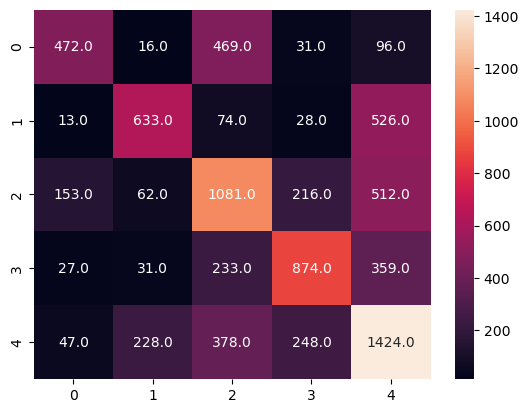

In [65]:
import seaborn as sns
sns.heatmap(cm_model, annot=True, fmt=".1f")

### Testing

In [73]:
ourtext = 'hey I am very  happy finall everting came back to normal'

In [74]:
ourtext = datacleaning(ourtext)
ourtext

'hey happy finall everting came back normal'

In [75]:
our_vector = vectorizer(ourtext)
le.inverse_transform(lr.predict([our_vector]))[0]

'Extremely Positive'